In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import fisher_exact, chi2_contingency

In [2]:
import scipy
scipy.__version__
# scipy.stats.version
scipy.version.full_version


'1.3.1'

In [3]:
# complete path_to_file:

path_to_file = r'D:\Ali USB Backup\Special\combined religion vs speciality (1).xlsx'

df_GMC = pd.read_excel(path_to_file, sheet_name = 'GMC data', usecols="A:J", nrows=14, index_col=0)  # non-indexed
df_HEE = pd.read_excel(path_to_file, sheet_name = 'HEE data combined', usecols="A:J", nrows=14, index_col=0)  # non-indexed


In [4]:
# print(chi2_contingency__version__)

In [5]:
df_GMC.dropna(axis='rows', how='all')
df_GMC.dropna(axis='columns', how='all')
df_GMC.sum().sum() # GMC

143081

In [6]:
df_HEE.dropna(axis='rows', how='all')
df_HEE.dropna(axis='columns', how='all')
df_HEE.sum().sum() # HEE

18222

# option 1

In [7]:


# df = df_GMC
df = df_HEE

In [8]:
df.dropna(axis='rows', how='all')
df.dropna(axis='columns', how='all')
df.head()

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics,307,12,239,71,70,6,9,40,153
Emergency medicine,300,24,283,103,259,6,10,48,166
GP,902,149,2060,533,1579,17,65,247,975
Medicine,464,177,635,226,899,20,30,91,442
O&G,108,24,302,93,263,6,9,29,105


# Table 1 in manuscript:

In [9]:


table1 = pd.DataFrame(np.array([
    ['England and Wales (2018)', 42.1, 46.7, 0.5, 1.8, 0.5, 5.7, 0.7, 1.7],
    ['UK doctors (2019)', 19.1, 34.4, 0.5, 2.2, 0.2, 3.7, 1.0, 39.1],
                        ]),
             columns=['stats for', 'Atheist', 'Christian', 'Buddhist', 'Hindu',
                     'Jewish', 'Muslim', 'Sikh', 'Any other religion/unknown'],
#              index=[ ],
            )


table1


,stats for,Atheist,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Any other religion/unknown
0,England and Wales (2018),42.1,46.7,0.5,1.8,0.5,5.7,0.7,1.7
1,UK doctors (2019),19.1,34.4,0.5,2.2,0.2,3.7,1.0,39.1


In [10]:
# UK Consultants GMC 2019:

GMC_total = df.sum().sum()
porportion_GMC = (df.sum()/GMC_total).to_frame().rename(columns={0:'Proportion of GMC Registered UK Consultants 2019'})

# porportion_GMC.to_csv(r'D:\Ali USB Backup\Special\GMC data summary.csv')
porportion_GMC

,Proportion of GMC Registered UK Consultants 2019
Atheism,0.169081
Buddhism,0.026671
Christianity,0.277192
Hinduism,0.080452
islam,0.235869
judaism,0.004884
sikh,0.009329
other,0.040446
unknown,0.156075


In [11]:
_GMC_specialist_percentages = np.array([
    0.092367, 0.142800, 0.004138, 0.035330, 0.003823, 0.032408, 0.003641, 0.681481+0.004012]) * 100

table1.loc[2, 'stats for'] = 'GMC Specialist Register (2019)'
table1.iloc[2, 1:] = _GMC_specialist_percentages

In [12]:
table1

,stats for,Atheist,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Any other religion/unknown
0,England and Wales (2018),42.1,46.7,0.5,1.8,0.5,5.7,0.7,1.7
1,UK doctors (2019),19.1,34.4,0.5,2.2,0.2,3.7,1.0,39.1
2,GMC Specialist Register (2019),9.2367,14.28,0.4138,3.533,0.3823,3.2408,0.3641,68.5493


In [13]:
table1.to_csv(r'D:\Ali USB Backup\Special\GMC data summmary 2 in context.csv')

In [14]:
table1.drop(columns='stats for', inplace=True)

In [15]:
table1 = table1.astype('float')
table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Atheist                     3 non-null      float64
 1   Christian                   3 non-null      float64
 2   Buddhist                    3 non-null      float64
 3   Hindu                       3 non-null      float64
 4   Jewish                      3 non-null      float64
 5   Muslim                      3 non-null      float64
 6   Sikh                        3 non-null      float64
 7   Any other religion/unknown  3 non-null      float64
dtypes: float64(8)
memory usage: 296.0 bytes


# OPTION 2: can skip. DOES NOT EXCLUDE DATA. MERGES A PROPORTION OF unkowns to RELIGIONS by specialty 

In [15]:
# GMC data included 45,574 doctors from a total of 143081

GMC_total = 143081
GMC_unknown = GMC_total - 45574
GMC_unknown_proportion = GMC_unknown / GMC_total  # 0.652

# find the proportions of data to move from unknown to the religious affiliations. 
# this can be the UK doctor proportions or the general Egnalnd and Wales porportions.

# # UK doctors proportion: multiply the UK doctors percentages with the raw unkwon and prefer not to say numbers:

# table1 = table1.drop(columns='stats for').astype('float')
# unknown_to_atheist = table1.loc[1, 'Atheist'] - table1.loc[2, 'Atheist']
# unknown_to_christian = table1.loc[1, 'Christian'] - table1.loc[2, 'Christian']
# unknown_to_jewish = table1.loc[1, 'Buddhist'] - table1.loc[2, 'Buddhist']
# unknown_to_muslim = table1.loc[1, 'Muslim'] - table1.loc[2, 'Muslim']
# unknown_to_sikh = table1.loc[1, 'Sikh'] - table1.loc[2, 'Sikh']

In [16]:
# unknown_to_atheist + unknown_to_christian+ unknown_to_jewish + unknown_to_muslim + unknown_to_sikh

In [17]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics,307,12,239,71,70,6,9,40,153
Emergency medicine,300,24,283,103,259,6,10,48,166
GP,902,149,2060,533,1579,17,65,247,975
Medicine,464,177,635,226,899,20,30,91,442
O&G,108,24,302,93,263,6,9,29,105
occupational medicine,2,0,12,2,3,1,0,3,2
opthalmology,49,9,95,21,81,3,3,21,86
Paediatrics,155,19,316,76,266,6,4,40,118
pathology,33,2,52,13,31,2,0,13,38
Pschiatry,133,17,166,39,101,0,6,33,88


In [18]:
# now distribute this extra data per religion, by existing specialty proportions.
# this assumed null hypothesis of no signfiicant difference between general UK doctors and specialist register


In [19]:
# # UK doctors proportion: simply multiply the UK doctors percentages with the raw ROW unknown and prefer not to say numbers:
# # i.e. impute by specialty, the unknowns, based on the proportions of UK doctors. 
# #  manual test follow below


# df_altered = df.copy()
# df_altered.loc['anaesthesia', 'Atheism'] = ( df.loc['anaesthesia', 'Atheism'] + 
#     (df.loc['anaesthesia', 'unknown and prefer not to say'] * table1.loc[1, 'Atheist'])/100
# )

In [20]:
# df_altered

In [21]:
# manual check to get 2586: 
(0.191*6850)+1278

2586.35

In [22]:
# now define the function to impute these:

def impute_redistribute(df_altered, specialty_col, religion_col, 
                       table1, population_religion, use_UK_doctors=True, GMC=True):
    """
    use_UK_doctors is when imputing using general UK doctor data to redistribute the unkowns by religious affiliations.
        If False, then uses England and Wales general population data instead. i.e two methods of imputing. 
    
    
    """
    
    if use_UK_doctors == True:
        population = 1
    else:
        population = 0
    if GMC:
        redistribute_col = 'unknown and prefer not to say'
    elif not GMC:
        redistribute_col = 'unknown'
    impute_amount = (
            df_altered.loc[specialty_col, redistribute_col] * table1.loc[population, population_religion]/100
        )
    
    # actual imputation:
    df_altered.loc[specialty_col, religion_col] = ( 
        df_altered.loc[specialty_col, religion_col] + impute_amount
          )
    
    return df_altered

In [23]:
# set up to cycle using above function

specialty_cols = list(df.index)
religion_cols = list(df.columns)
population_religions = list(table1.columns)

In [24]:
population_religions

['Atheist',
 'Christian',
 'Buddhist',
 'Hindu',
 'Jewish',
 'Muslim',
 'Sikh',
 'Any other religion/unknown']

In [25]:
religion_cols.pop(-1)
religion_cols

['Atheism',
 'Buddhism',
 'Christianity',
 'Hinduism',
 'islam',
 'judaism',
 'sikh',
 'other']

In [26]:
specialty_cols

['Anaesthetics',
 'Emergency medicine',
 'GP',
 'Medicine',
 'O&G',
 'occupational medicine',
 'opthalmology',
 'Paediatrics',
 'pathology',
 'Pschiatry',
 'public health',
 'radiology',
 'Surgery',
 'other']

In [45]:
# homogenise names for GMC

table1.rename(columns={'Atheist': 'Atheism',
                       'Christian': 'christian',
                      'Buddhist': 'buddhist',
                      'Hindu': 'hindu',
                      'Jewish': 'jewish',
                       'Muslim': 'muslim',
                      'Sikh': 'sikh',
                       'Any other religion/unknown': 'other',
                      }, inplace=True)

In [27]:
# homogenise names for HEE

table1.rename(columns={'Atheist': 'Atheism',
                       'Christian': 'Christianity',
                      'Buddhist': 'Buddhism',
                      'Hindu': 'Hinduism',
                      'Jewish': 'judaism',
                       'Muslim': 'islam',
                      'Sikh': 'sikh',
                       'Any other religion/unknown': 'other',
                      }, inplace=True)

In [34]:
# now cycle using above:
GMC_impute = False  # set to true if GMC data, False if HEE data. 

In [28]:
df_altered = df.copy()

for specialty_col in specialty_cols:
    for religion_col in religion_cols:
        
        df_altered = impute_redistribute(df_altered, specialty_col, religion_col, 
                           table1, population_religion=religion_col, 
                                         use_UK_doctors=True, GMC=GMC_impute)     

In [29]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics,307,12,239,71,70,6,9,40,153
Emergency medicine,300,24,283,103,259,6,10,48,166
GP,902,149,2060,533,1579,17,65,247,975
Medicine,464,177,635,226,899,20,30,91,442
O&G,108,24,302,93,263,6,9,29,105
occupational medicine,2,0,12,2,3,1,0,3,2
opthalmology,49,9,95,21,81,3,3,21,86
Paediatrics,155,19,316,76,266,6,4,40,118
pathology,33,2,52,13,31,2,0,13,38
Pschiatry,133,17,166,39,101,0,6,33,88


In [30]:
# now inspect result

In [31]:
df_altered

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics,336.223,12.765,291.632,74.366,75.661,6.306,10.53,99.823,153
Emergency medicine,331.706,24.830,340.104,106.652,265.142,6.332,11.66,112.906,166
GP,1088.225,153.875,2395.400,554.450,1615.075,18.950,74.75,628.225,975
Medicine,548.422,179.210,787.048,235.724,915.354,20.884,34.42,263.822,442
O&G,128.055,24.525,338.120,95.310,266.885,6.210,10.05,70.055,105
occupational medicine,2.382,0.010,12.688,2.044,3.074,1.004,0.02,3.782,2
opthalmology,65.426,9.430,124.584,22.892,84.182,3.172,3.86,54.626,86
Paediatrics,177.538,19.590,356.592,78.596,270.366,6.236,5.18,86.138,118
pathology,40.258,2.190,65.072,13.836,32.406,2.076,0.38,27.858,38
Pschiatry,149.808,17.440,196.272,40.936,104.256,0.176,6.88,67.408,88


In [32]:
df_altered - df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics,29.223,0.765,52.632,3.366,5.661,0.306,1.53,59.823,0
Emergency medicine,31.706,0.830,57.104,3.652,6.142,0.332,1.66,64.906,0
GP,186.225,4.875,335.400,21.450,36.075,1.950,9.75,381.225,0
Medicine,84.422,2.210,152.048,9.724,16.354,0.884,4.42,172.822,0
O&G,20.055,0.525,36.120,2.310,3.885,0.210,1.05,41.055,0
occupational medicine,0.382,0.010,0.688,0.044,0.074,0.004,0.02,0.782,0
opthalmology,16.426,0.430,29.584,1.892,3.182,0.172,0.86,33.626,0
Paediatrics,22.538,0.590,40.592,2.596,4.366,0.236,1.18,46.138,0
pathology,7.258,0.190,13.072,0.836,1.406,0.076,0.38,14.858,0
Pschiatry,16.808,0.440,30.272,1.936,3.256,0.176,0.88,34.408,0


In [35]:

# now just delete the unkown and prefer not to say religious affiliation col as it's served its purpose:
# have to merge other and unkowns here given the way the data was presented in Table1 "other/unkown" combined:

if GMC_impute:
    del(df_altered['unknown and prefer not to say'])
elif not GMC_impute:
    del(df_altered['unknown'])

df_altered

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other
Anaesthetics,336.223,12.765,291.632,74.366,75.661,6.306,10.53,99.823
Emergency medicine,331.706,24.830,340.104,106.652,265.142,6.332,11.66,112.906
GP,1088.225,153.875,2395.400,554.450,1615.075,18.950,74.75,628.225
Medicine,548.422,179.210,787.048,235.724,915.354,20.884,34.42,263.822
O&G,128.055,24.525,338.120,95.310,266.885,6.210,10.05,70.055
occupational medicine,2.382,0.010,12.688,2.044,3.074,1.004,0.02,3.782
opthalmology,65.426,9.430,124.584,22.892,84.182,3.172,3.86,54.626
Paediatrics,177.538,19.590,356.592,78.596,270.366,6.236,5.18,86.138
pathology,40.258,2.190,65.072,13.836,32.406,2.076,0.38,27.858
Pschiatry,149.808,17.440,196.272,40.936,104.256,0.176,6.88,67.408


In [36]:
# sweet, so now we have df_altered and can proceed

df = df_altered.copy()

In [37]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other
Anaesthetics,336.223,12.765,291.632,74.366,75.661,6.306,10.53,99.823
Emergency medicine,331.706,24.830,340.104,106.652,265.142,6.332,11.66,112.906
GP,1088.225,153.875,2395.400,554.450,1615.075,18.950,74.75,628.225
Medicine,548.422,179.210,787.048,235.724,915.354,20.884,34.42,263.822
O&G,128.055,24.525,338.120,95.310,266.885,6.210,10.05,70.055
occupational medicine,2.382,0.010,12.688,2.044,3.074,1.004,0.02,3.782
opthalmology,65.426,9.430,124.584,22.892,84.182,3.172,3.86,54.626
Paediatrics,177.538,19.590,356.592,78.596,270.366,6.236,5.18,86.138
pathology,40.258,2.190,65.072,13.836,32.406,2.076,0.38,27.858
Pschiatry,149.808,17.440,196.272,40.936,104.256,0.176,6.88,67.408


# option 2

In [16]:
# comment out at least one of the below

exclude = []  # GMC 9 cols, HEE 9 cols
# exclude = ['unknown and prefer not to say', 'other']  # GMC =7 cols
# exclude = ['unknown', 'other']  # HEE =7 cols


df.drop(columns=exclude, inplace=True)

In [17]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics,307,12,239,71,70,6,9,40,153
Emergency medicine,300,24,283,103,259,6,10,48,166
GP,902,149,2060,533,1579,17,65,247,975
Medicine,464,177,635,226,899,20,30,91,442
O&G,108,24,302,93,263,6,9,29,105
occupational medicine,2,0,12,2,3,1,0,3,2
opthalmology,49,9,95,21,81,3,3,21,86
Paediatrics,155,19,316,76,266,6,4,40,118
pathology,33,2,52,13,31,2,0,13,38
Pschiatry,133,17,166,39,101,0,6,33,88


In [18]:
df.sum().sum()

18222

# overall chi-squared

### For GMC

In [39]:
chi, p, dof, exp = chi2_contingency(df, correction=True)

chi, p, dof

(954.6019238647497, 5.1225475811702755e-144, 91)

In [40]:
chi, p, dof, exp = chi2_contingency(df, correction=True, lambda_="log-likelihood")

chi, p, dof



(924.8489761768744, 3.628665287763059e-138, 91)

    ### --> for GMC data the chi2 analysis is significant for the entire data (chi2 = 3010, p=0.0, dof= 104)
    ### as it is for 7 columns (removed other/unknown prefer not to say): (1083.9460733276355, 6.733454346030107e-177, 78)

### for HEE

In [19]:
chi, p, dof, exp = chi2_contingency(df, correction=True)

chi, p, dof

(1117.2188820891492, 2.2509819308934262e-169, 104)

In [20]:
chi, p, dof, exp = chi2_contingency(df, correction=True, lambda_="log-likelihood")

chi, p, dof

(1109.6117817565137, 7.131866628918338e-168, 104)

### --> for HEE data the chi2 analysis is significant for the entire data (chi2 = 1117, p=2.29x10-169, dof= 104)

### excluding unknown and other: (948.1025331020614, 1.3218846438237725e-149, 78)

### overall expected df:

In [21]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics,307,12,239,71,70,6,9,40,153
Emergency medicine,300,24,283,103,259,6,10,48,166
GP,902,149,2060,533,1579,17,65,247,975
Medicine,464,177,635,226,899,20,30,91,442
O&G,108,24,302,93,263,6,9,29,105
occupational medicine,2,0,12,2,3,1,0,3,2
opthalmology,49,9,95,21,81,3,3,21,86
Paediatrics,155,19,316,76,266,6,4,40,118
pathology,33,2,52,13,31,2,0,13,38
Pschiatry,133,17,166,39,101,0,6,33,88


# now ready to do multiple chisquared for all columns and rows
# i.e. 14 rows and 9 columns if no dropna

In [22]:
#THIS

try:

    list_all_religions = [i for i in list(df.columns) if i not in exclude]
    
except NameError:
    list_all_religions = [i for i in list(df.columns)]

In [23]:
#THIS

for religion in list_all_religions:  # cycle through all religious affiliations
    print('\n\nReligion: ', religion)
    
    

    df['Other Religion'] = df[[i for i in list_all_religions if i not in [religion]]].sum(axis='columns')



    
    chi, p_value, dof, exp = chi2_contingency(df[[religion, 'Other Religion']])
    


    if p_value < (0.005/672):  # global bonferroni for all specialties and religions

        print(religion, ' vs other: chi-sq of all specialties is significant with correction for multiple comparisons.')
        print('chi_sq = ', chi)
        print('p value = ', p_value)
        print('dof = ', dof)
        print('expected: ', exp)


        



Religion:  Atheism
Atheism  vs other: chi-sq of all specialties is significant with correction for multiple comparisons.
chi_sq =  386.3234831083006
p value =  1.7248306911159698e-74
dof =  13
expected:  [[1.53356767e+02 7.53643233e+02]
 [2.02728515e+02 9.96271485e+02]
 [1.10359384e+03 5.42340616e+03]
 [5.04538689e+02 2.47946131e+03]
 [1.58767369e+02 7.80232631e+02]
 [4.22703326e+00 2.07729667e+01]
 [6.22219295e+01 3.05778070e+02]
 [1.69081330e+02 8.30918670e+02]
 [3.11109648e+01 1.52889035e+02]
 [9.85744155e+01 4.84425584e+02]
 [1.30699868e+02 6.42300132e+02]
 [1.63501646e+02 8.03498354e+02]
 [2.65626770e+02 1.30537323e+03]
 [3.29708594e+01 1.62029141e+02]]


Religion:  Buddhism
Buddhism  vs other: chi-sq of all specialties is significant with correction for multiple comparisons.
chi_sq =  166.17149677401545
p value =  1.1062490057467955e-28
dof =  13
expected:  [[2.41906487e+01 8.82809351e+02]
 [3.19785973e+01 1.16702140e+03]
 [1.74081989e+02 6.35291801e+03]
 [7.95864340e+01 2.9044

### using all the GMC data, all religions are chi2 significant. same for HEE. if excluding the unknown and prefer not to say, same results except Sikhism and Hinduism no longer significant on HEE only. also if using global bonferroni 672, sikh and buddhism results as a col are not significant. 

In [46]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,Other Religion
Anaesthetics,336.223,12.765,291.632,74.366,75.661,6.306,10.53,99.823,807.483
Emergency medicine,331.706,24.830,340.104,106.652,265.142,6.332,11.66,112.906,1086.426
GP,1088.225,153.875,2395.400,554.450,1615.075,18.950,74.75,628.225,5900.725
Medicine,548.422,179.210,787.048,235.724,915.354,20.884,34.42,263.822,2721.062
O&G,128.055,24.525,338.120,95.310,266.885,6.210,10.05,70.055,869.155
occupational medicine,2.382,0.010,12.688,2.044,3.074,1.004,0.02,3.782,21.222
opthalmology,65.426,9.430,124.584,22.892,84.182,3.172,3.86,54.626,313.546
Paediatrics,177.538,19.590,356.592,78.596,270.366,6.236,5.18,86.138,914.098
pathology,40.258,2.190,65.072,13.836,32.406,2.076,0.38,27.858,156.218
Pschiatry,149.808,17.440,196.272,40.936,104.256,0.176,6.88,67.408,515.768


## now for chi2/fisher for each cell (9*14):

# update bonferroni correction: x 4:

# number of calculations = 672
# 0.005 / 672 = 7.4e-6


# make into exp_df and then diff_df: UNCOMMENT exp_df_GMC two cells below

In [24]:
# THIS
# initialise
exp_df_GMC = pd.DataFrame().reindex_like(df)
exp_df_GMC.drop(columns='Other Religion', inplace=True)


exp_df_HEE = pd.DataFrame().reindex_like(df)
exp_df_HEE.drop(columns='Other Religion', inplace=True)

In [25]:
# THIS
# COMMENT OUT EITHER #1 or #2

# the below has been validated by hand for muslim/medicine and anaesthetist/Atheist...
# ...in terms of 2 x 2 contingency table formulation.


for religion in list_all_religions:  # cycle through all religious affiliations
    print('\n\nReligion: ', religion)
    
    for specialty in df.index:
        analysis_df = pd.DataFrame()
        analysis_df[religion] = df[religion]
        analysis_df['Other Religion'] = df[[i for i in list_all_religions if i not in [religion]]].sum(axis='columns')
        analysis_df.loc['Other Specialty']  = df.loc[[i for i in df.index if i not in [specialty]]].sum(axis='rows')
        
        temp_df = df.drop(columns=[religion, 'Other Religion'], index=specialty)
        analysis_df.loc['Other Specialty', 'Other Religion'] = temp_df.sum().sum()

        chi, p_value, dof, exp = chi2_contingency(analysis_df.loc[[specialty,'Other Specialty']]
                                                    )
    
        # all GMC
#         exp_df.loc[specialty, religion] = (round(exp[0][0]))
    
        bonferroni = 2*(df.drop(columns='Other Religion').shape[0]*df.drop(columns='Other Religion').shape[1])
        bonferroni = 672
        if p_value < (0.005/bonferroni):  # bonferroni for all specialties and religions multiplied

            # populate only statistically significant
            
            #1:
#             exp_df_GMC.loc[specialty, religion] = (round(exp[0][0]))
            
            #2
            exp_df_HEE.loc[specialty, religion] = (round(exp[0][0]))



#             exp_df.loc[specialty, religion] = exp_df.loc[specialty, religion] +r'*'
            
            
            print(religion, specialty, ' vs other: 2x2 chi-sq significant with correction for multiple comparisons.')
#             print('chi_sq = ', chi)
            print('p value = ', round(p_value,2))
            print('dof = ', dof)
            print('expected: ', exp[0][0])

            if exp[0][0] <5:
                print()
                print()
                print('noooooooooooooooooooooooooooooooooooooooooooooooo!')
                print(religion, specialty)



Religion:  Atheism
Atheism Anaesthetics  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  153.35676654593348
Atheism Emergency medicine  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  202.72851498189002
Atheism GP  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  1103.5938426078367
Atheism O&G  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  158.7673691142575
Atheism public health  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  130.6998682910767


Religion:  Buddhism
Buddhism Medicine  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  79.5864339809022


Religion:  Christianity
Christianity GP  vs other: 2x2 chi-sq signif

In [26]:
# exp_df_GMC  # exp _df 2 x 2 chi 2 GMC

In [27]:
bonferroni

672

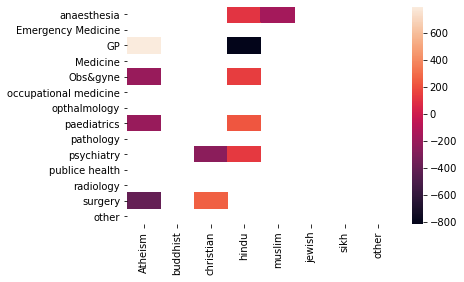

In [51]:
# GMC all

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.drop(columns='Other Religion') - exp_df_GMC)
plt.show()

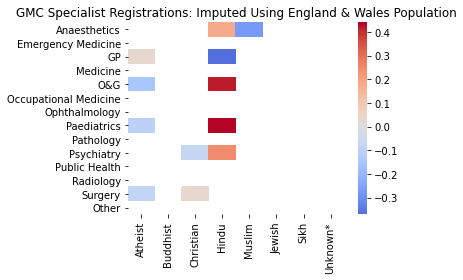

In [54]:
# GMC only statistically significant

import seaborn as sns
import matplotlib.pyplot as plt

normalise_index_names={'anaesthesia': "Anaesthetics", 'Obs&gyne': "O&G", "paediatrics":"Paediatrics",
                        'psychiatry': "Psychiatry", 
                       "surgery": "Surgery", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'publice health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'buddhist': 'Buddhist',
             'christian': 'Christian',
             'hindu': 'Hindu',
             'muslim': 'Muslim',
             'jewish': 'Jewish',
             'sikh': 'Sikh',
             'other': 'Unknown*', # if imputed, other and unknown combined category
            }
    

exp_df_GMC.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)


## define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_GMC
normalised_diff_df = diff_df/df.drop(columns='Other Religion')

sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)

# plt.title('GMC Specialist Registrations: Imputed Using England & Wales Population')
plt.tight_layout()
# DO NOT SAVE THIS USE CELL BELOW
# plt.savefig(r'D:\Ali USB Backup\Special\star_GMC_imputedEnglandWales_Bonferroni672_alpha0.005.png', format='png', dpi=1000)
plt.show()

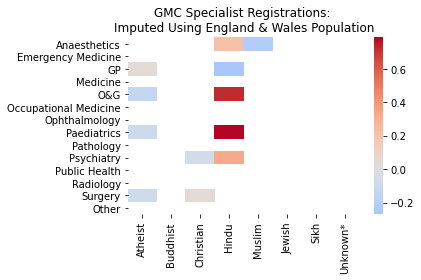

In [58]:
# GMC only statistically significant: normalise wrt expected

import seaborn as sns
import matplotlib.pyplot as plt

normalise_index_names={'anaesthesia': "Anaesthetics", 'Obs&gyne': "O&G", "paediatrics":"Paediatrics",
                        'psychiatry': "Psychiatry", 
                       "surgery": "Surgery", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'buddhist': 'Buddhist',
             'christian': 'Christian',
             'hindu': 'Hindu',
             'muslim': 'Muslim',
             'jewish': 'Jewish',
             'sikh': 'Sikh',
            }
    

exp_df_GMC.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)


## define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_GMC
normalised_diff_df = diff_df/exp_df_GMC

sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)

plt.title('GMC Specialist Registrations: \nImputed Using England & Wales Population')
plt.tight_layout()
plt.savefig(r'D:\Ali USB Backup\Special\star_GMC_imputedEnglandWales_Bonferroni672_alpha0.005.png', format='png', dpi=1000)
plt.show()

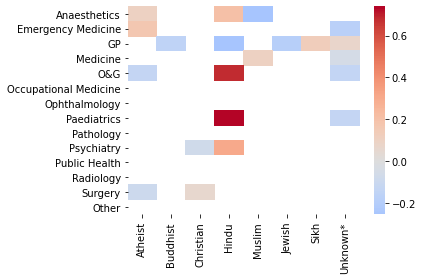

In [219]:
# GMC only statistically significant: normalise wrt expected - ALL DATA

import seaborn as sns
import matplotlib.pyplot as plt

normalise_index_names={'anaesthesia': "Anaesthetics", 'Obs&gyne': "O&G", "paediatrics":"Paediatrics",
                        'psychiatry': "Psychiatry", 
                       "surgery": "Surgery", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'buddhist': 'Buddhist',
             'christian': 'Christian',
             'hindu': 'Hindu',
             'muslim': 'Muslim',
             'jewish': 'Jewish',
             'sikh': 'Sikh',
            }
    

exp_df_GMC.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
exp_df_GMC.rename(columns={'unknown and prefer not to say':'unknown'}, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(columns={'unknown and prefer not to say':'unknown'}, inplace=True)


## define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_GMC
normalised_diff_df = diff_df/exp_df_GMC

sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)

# plt.title('GMC Specialist Registrations')
plt.tight_layout()
# plt.savefig(r'D:\Ali USB Backup\Special\ALLDATA_GMC_significant_normalised_alpha_0.005.jpg', format='jpg', dpi=1000)
plt.show()

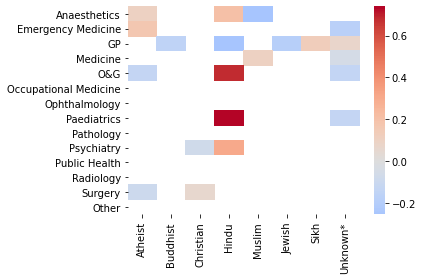

In [220]:
# GMC only statistically significant: normalise wrt expected
# GMC exclusions, after imputation OPTION 3

import seaborn as sns
import matplotlib.pyplot as plt

normalise_index_names={'anaesthesia': "Anaesthetics", 'Obs&gyne': "O&G", "paediatrics":"Paediatrics",
                        'psychiatry': "Psychiatry", 
                       "surgery": "Surgery", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'buddhist': 'Buddhist',
             'christian': 'Christian',
             'hindu': 'Hindu',
             'muslim': 'Muslim',
             'jewish': 'Jewish',
             'sikh': 'Sikh',
            }
    

exp_df_GMC.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)


## define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_GMC
normalised_diff_df = diff_df/exp_df_GMC

sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)

# plt.title('GMC Specialist Registrations')
plt.tight_layout()
# plt.savefig(r'D:\Ali USB Backup\Special\GMC_imputed_exclusions.jpg', format='jpg', dpi=1000)
plt.show()

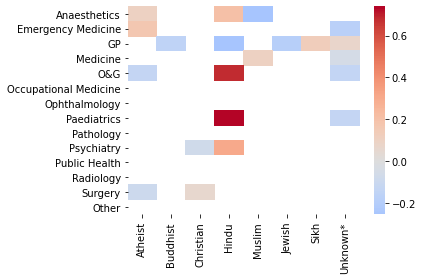

In [221]:
# GMC only statistically significant: normalise wrt expected
# GMC NO exclusions, after imputation OPTION 3

import seaborn as sns
import matplotlib.pyplot as plt

normalise_index_names={'anaesthesia': "Anaesthetics", 'Obs&gyne': "O&G", "paediatrics":"Paediatrics",
                        'psychiatry': "Psychiatry", 
                       "surgery": "Surgery", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                       'publice health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'buddhist': 'Buddhist',
             'christian': 'Christian',
             'hindu': 'Hindu',
             'muslim': 'Muslim',
             'jewish': 'Jewish',
             'sikh': 'Sikh',
            }
    

exp_df_GMC.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)


## define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_GMC
normalised_diff_df = diff_df/exp_df_GMC

normalised_diff_df.rename(columns={'unknown and prefer not to say':'unknown'}, inplace=True)
sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)

# plt.title('GMC Specialist Registrations')
plt.tight_layout()
# plt.savefig(r'D:\Ali USB Backup\Special\GMC_imputed_NOexclusions.jpg', format='jpg', dpi=1000)
plt.show()

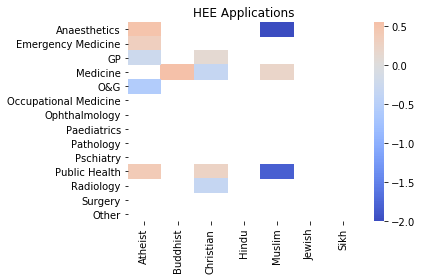

In [50]:
# HEE only statistically significant

import seaborn as sns
import matplotlib.pyplot as plt


normalise_index_names={'Emergency medicine': "Emergency Medicine",
                        'psychiatry': "Psychiatry", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'Buddhism': 'Buddhist',
             'Christianity': 'Christian',
             'Hinduism': 'Hindu',
#              'Islam': 'Muslim',
             'islam': 'Muslim',
             'judaism': 'Jewish',
             'sikh': 'Sikh',
            }


exp_df_HEE.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)

# define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_HEE
normalised_diff_df = diff_df/df.drop(columns='Other Religion')

# plot:
sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)  # coolwarm, RdGy_r

# plt.title('HEE Applications')
plt.tight_layout()
# plt.savefig(r'D:\Ali USB Backup\Special\HEE_significant_normalised_alpha_0.005_title.jpg', format='jpg', dpi=1000)
plt.show()

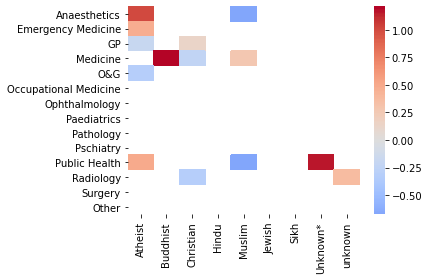

In [29]:
# HEE only statistically significant - divide by expected

import seaborn as sns
import matplotlib.pyplot as plt


normalise_index_names={'Emergency medicine': "Emergency Medicine",
                        'psychiatry': "Psychiatry", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'Buddhism': 'Buddhist',
             'Christianity': 'Christian',
             'Hinduism': 'Hindu',
#              'Islam': 'Muslim',
             'islam': 'Muslim',
             'judaism': 'Jewish',
             'sikh': 'Sikh',
             'other': 'Unknown*'
            }


exp_df_HEE.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)

# define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_HEE
normalised_diff_df = diff_df/exp_df_HEE

# plot:
sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)  # coolwarm, RdGy_r

# plt.title('HEE Applications: All Data')
plt.tight_layout()
plt.savefig(r'D:\Ali USB Backup\Special\star_HEE_ALLDATA_Bonferroni672_alpha0.005_notitle.png', format='png', dpi=1000)
plt.show()

In [ ]:
# ferroro next?

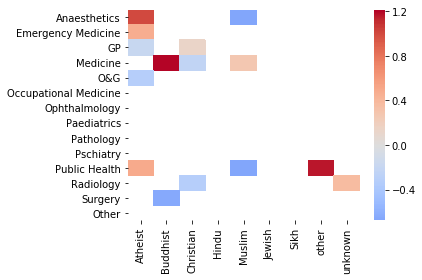

In [29]:
# HEE only statistically significant - divide by expected - ALL DATA NO EXLUSONS

import seaborn as sns
import matplotlib.pyplot as plt


normalise_index_names={'Emergency medicine': "Emergency Medicine",
                        'psychiatry': "Psychiatry", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'Buddhism': 'Buddhist',
             'Christianity': 'Christian',
             'Hinduism': 'Hindu',
#              'Islam': 'Muslim',
             'islam': 'Muslim',
             'judaism': 'Jewish',
             'sikh': 'Sikh',
            }


exp_df_HEE.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)

# define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_HEE
normalised_diff_df = diff_df/exp_df_HEE

# plot:
sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)  # coolwarm, RdGy_r

# plt.title('HEE Applications')
plt.tight_layout()
plt.savefig(r'D:\Ali USB Backup\Special\ALLDATA_HEE_significant_normalised_alpha_0.005.jpg', format='jpg', dpi=1000)
plt.show()

# GMC - HEE : if when multiplied = negative 
# this looks at over or under represented if the reverse is true in applications

In [42]:
df_inference = pd.DataFrame().reindex_like(exp_df_GMC)

for i in range(len(df_inference.index)):
    for j in range(len(df_inference.columns)):
        
        if exp_df_GMC.iloc[i,j] * exp_df_HEE.iloc[i,j] < 0:
            df_inference.iloc[i,j] = exp_df_GMC.iloc[i,j] - exp_df_HEE.iloc[i,j]
            
df_inference

,Atheism,buddhist,christian,hindu,muslim,jewish,sikh
anaesthesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emergency Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obs&gyne,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupational medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opthalmology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paediatrics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pathology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
psychiatry,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cramer's V or Theil's U

In [ ]:
%who

In [18]:
df.drop(columns='Other Religion', inplace=True)
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh
Anaesthetics,307,12,239,71,70,6,9
Emergency medicine,300,24,283,103,259,6,10
GP,902,149,2060,533,1579,17,65
Medicine,464,177,635,226,899,20,30
O&G,108,24,302,93,263,6,9
occupational medicine,2,0,12,2,3,1,0
opthalmology,49,9,95,21,81,3,3
Paediatrics,155,19,316,76,266,6,4
pathology,33,2,52,13,31,2,0
Pschiatry,133,17,166,39,101,0,6


In [19]:

def make_df_datamatrix(df, i = 'Anaesthetics', j = 'Atheist'):
    total_no_ppl = df.sum().sum()
    df_datamatrix = pd.DataFrame(index=range(0, total_no_ppl), columns=['Specialty', 'Religion'])

    start_row = 0
    no_rows = (df.loc[i, j]) -1
    if no_rows < 1: 
        pass

    else:
        df_datamatrix.loc[start_row : no_rows, ['Specialty', 'Religion']] = i, j
    # start_row = start_row + no_rows

    return df_datamatrix.loc[df_datamatrix.Specialty.notnull()]

In [20]:
# dm1 =  make_df_datamatrix(df, i = 'Anaesthetics', j = 'Atheist')
# dm2 =  make_df_datamatrix(df, i = 'Anaesthetics', j = 'Buddhist')
# DM = dm1.append(dm2)

# dm3 =  make_df_datamatrix(df, i = 'Anaesthetics', j = df.columns[2])  #
# DM = dm1.append([dm2, dm3])

In [21]:
def iterate_make_df(df):
    for i in df.index:
        for j in df.columns:
            dm =  make_df_datamatrix(df, i=i, j=j)  #
            try:
                DM = DM.append(dm, ignore_index=True)
            except UnboundLocalError:
                DM = dm
    return DM

In [22]:
# del(DM)
DM = iterate_make_df(df)
DM.head()

,Specialty,Religion
0,Anaesthetics,Atheism
1,Anaesthetics,Atheism
2,Anaesthetics,Atheism
3,Anaesthetics,Atheism
4,Anaesthetics,Atheism


In [23]:
DM = pd.get_dummies(DM)

In [24]:
DM.head()

,Specialty_Anaesthetics,Specialty_Emergency medicine,Specialty_GP,Specialty_Medicine,Specialty_O&G,Specialty_Paediatrics,Specialty_Pschiatry,Specialty_Surgery,Specialty_occupational medicine,Specialty_opthalmology,...,Specialty_pathology,Specialty_public health,Specialty_radiology,Religion_Atheism,Religion_Buddhism,Religion_Christianity,Religion_Hinduism,Religion_islam,Religion_judaism,Religion_sikh
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
import sys
sys.path.insert(0, r"C:\Users\ali_m\AnacondaProjects\PhD\Epilepsy_Surgery_Project")
from crosstab.Semiology_Crosstab.Semiology_Crosstab_exclude_files_with_outcome_8 import*
from crosstab.Semiology_Crosstab.main_dataframe import*
from crosstab.Semiology_Crosstab.populate_main_dataframe import*
from crosstab.outcomes import*
from Stats.performance_metrics import *
from Stats.model_performance import *
from Sklearn_and_plots.plot_coefficients_all import plot_coefficients_all


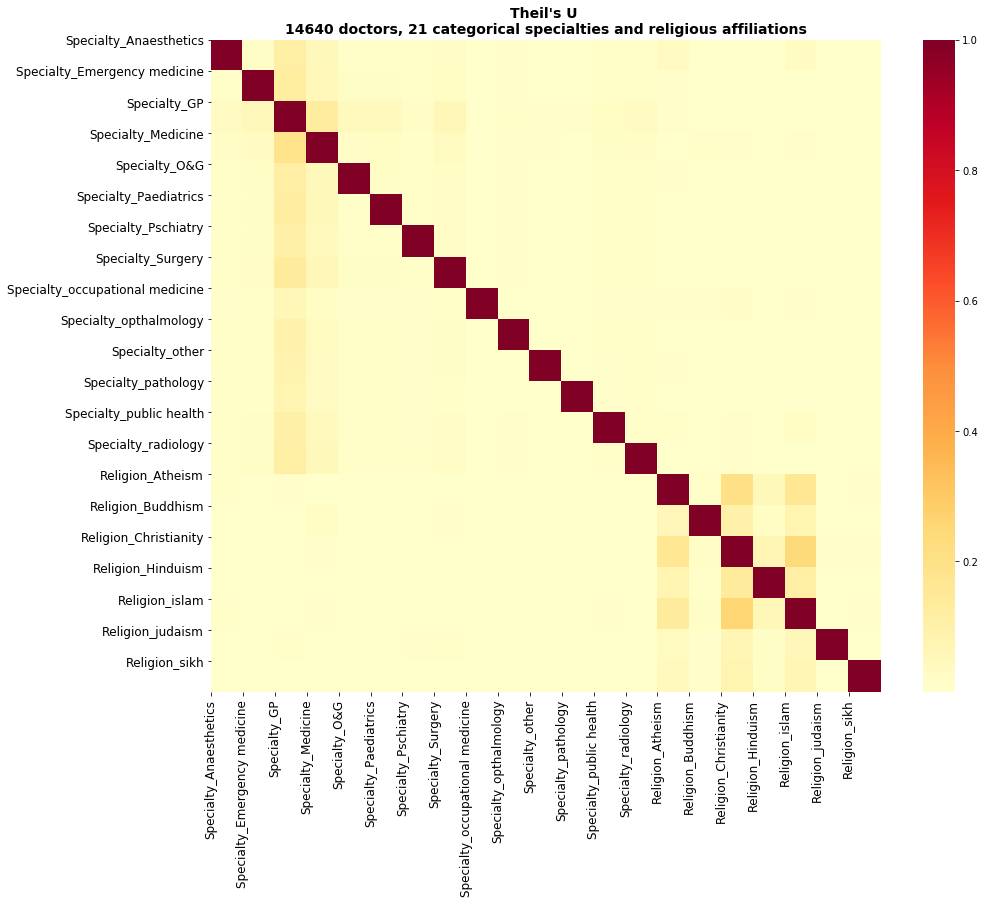

In [27]:



# # rearrange columns
# X_HS_model = X_HS_model[[c for c in X_HS_model if c not in ['EZ', 'Hippocampal Sclerosis', 'SVC SoS', 'SVC SoS+HS', 'GB SoS', 'GB SoS+HS']] + ['Hippocampal Sclerosis', 'SVC SoS', 'SVC SoS+HS', 'GB SoS', 'GB SoS+HS', 'EZ']]


# plot
corr_GMC_exclude = associations(DM, 
                          nominal_columns='all', mark_columns=False, Theils_U=True, plot=True,
                          return_results = True, 
                          savefigure=True, path_name='D:\\Ali USB Backup\\Special\\Mo Jo Theils U HEE exclude.jpg',
                          title_auto=False, #cmap='coolwarm',
                       figsize=(15, 12),
                               )


UnboundLocalError: local variable 'title' referenced before assignment

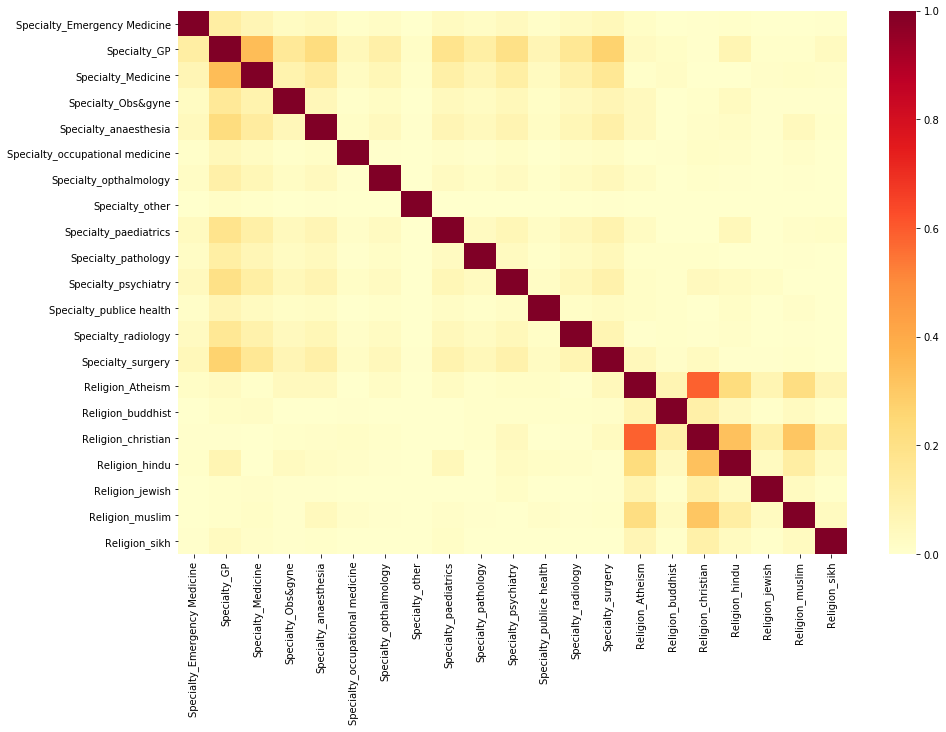

In [23]:
corr_GMC_exclude = associations(DM, 
                          nominal_columns='all', mark_columns=False, Theils_U=False, plot=True,
                          return_results = True, 
                          savefigure=False, #path_name = 'D:\\Ali USB Backup\\Special\\Mo Jo Cramers V GMC exclude.jpg',
                          title_auto=False, 
                       figsize=(15, 10),
                               )

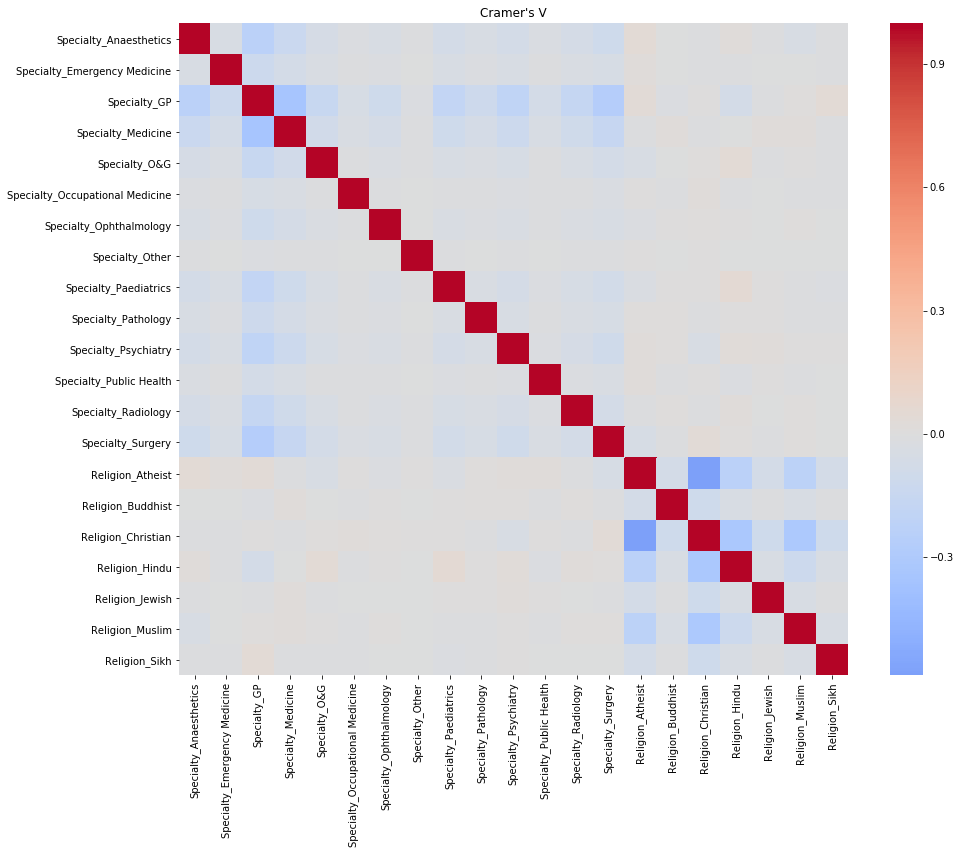

In [58]:
plt.figure(figsize=(15,12))
plt.title('Cramer\'s V')
sns.heatmap(DM.corr('pearson'), cmap='coolwarm', center=0)